In [1]:
!pip install -U open-metric-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 28.1 MB/s 
     |████████████████████████████████| 7.8 MB 34.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.2 MB 58.9 MB/s 
     |████████████████████████████████| 151 kB 75.3 MB/s 
     |████████████████████████████████| 700 kB 74.6 MB/s 
     |████████████████████████████████| 439 kB 81.8 MB/s 
     |████████████████████████████████| 79 kB 9.3 MB/s 
     |████████████████████████████████| 316 kB 81.5 MB/s 
     |████████████████████████████████| 117 kB 59.9 MB/s 
     |████████████████████████████████| 121 kB 77.0 MB/s 
     |████████████████████████████████| 829 kB 77.4 MB/s 
     |████████████████████████████████| 132 kB 77.7 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |███████████████████

In [192]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="d5bTIrPXus6KlhQsCC8V")
project = rf.workspace("cards-o18an").project("yolov5-card-detection")
dataset = project.version(3).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 876 kB/s 
     |████████████████████████████████| 138 kB 67.4 MB/s 
     |████████████████████████████████| 178 kB 69.5 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 145 kB 78.3 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=5760eb8ed1d78d4b8a5edc59aada1faf7177947b76aac93e3bfb96b94f3af5d5
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
  Attempting uninstall: certifi
    Found existing installation: ce

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Yolov5-Card-Detection-3 in yolov5pytorch:: 100%|██████████| 1810/1810 [00:00<00:00, 2913.64it/s]


In [35]:
#!unzip check.zip

Archive:  check.zip
replace check/cropped/test/0_14.0_-6-_png.rf.ab17454734e9504cb8bc221422b7d610.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: check/cropped/test/0_14.0_-6-_png.rf.ab17454734e9504cb8bc221422b7d610.jpg  
  inflating: check/cropped/test/10_0.0_-6-_png.rf.ab17454734e9504cb8bc221422b7d610.jpg  
  inflating: check/cropped/test/11_21.0_-6-_png.rf.ab17454734e9504cb8bc221422b7d610.jpg  
  inflating: check/cropped/test/12_8.0_-6-_png.rf.ab17454734e9504cb8bc221422b7d610.jpg  
  inflating: check/cropped/test/13_10.0_-6-_png.rf.ab17454734e9504cb8bc221422b7d610.jpg  
  inflating: check/cropped/test/14_6.0_-6-_png.rf.ab17454734e9504cb8bc221422b7d610.jpg  
  inflating: check/cropped/test/15_5.0_-6-_png.rf.ab17454734e9504cb8bc221422b7d610.jpg  
  inflating: check/cropped/test/16_5.0_-6-_png.rf.ab17454734e9504cb8bc221422b7d610.jpg  
  inflating: check/cropped/test/17_11.0_-6-_png.rf.ab17454734e9504cb8bc221422b7d610.jpg  
  inflating: check/cropped/test/18_7.0_-6-_png.rf.ab1

In [2]:
import pandas as pd
from glob import glob

# data crop

In [206]:
!mkdir cards
!mkdir cards/cropped
!mkdir cards/cropped/test
!mkdir cards/cropped/train
!mkdir cards/cropped/valid

In [199]:
PT = 'Yolov5-Card-Detection-3/'
DEST = 'cards/cropped'
FIN_SIZE = 200


In [200]:
from PIL import Image

In [207]:
def create_dataframe_and_files(filename, n):
    labels = PT + f'{n}/labels/' + filename.split('/')[-1][:-4] + '.txt'
    im = Image.open(filename)
    l_list = []
    amnt = 0
    for line in open(labels).readlines():
        l, c_x, c_y, w_x, w_y = map(float, line.split(' '))
        b_x = int((c_x - w_x/2) * im.width)
        e_x = int((c_x + w_x/2) * im.width)
        b_y = int((c_y - w_y/2) * im.height)
        e_y = int((c_y + w_y/2) * im.height)
        #print([l, b_x, e_x, b_y, e_y])
        l_list.append([l, b_x, b_y, e_x, e_y])
        im1 = im.crop((b_x, b_y, e_x, e_y)).resize((FIN_SIZE, FIN_SIZE))
        #plt.imshow(im1)
        #plt.show()
        im1.save(DEST + f'/{n}/{amnt}_{l}_' + filename.split('/')[-1])
        amnt += 1
    

In [208]:
nms = ['test', 'train', 'valid']
nm2 = ['images', 'labels']
for n in nms:
    images = glob(PT + n + '/images/*')
    for img in images:
        create_dataframe_and_files(img, n)
        #print(glob(PT + n + '/*'))

# embeds

In [269]:
nms = [
    'cards/cropped/train',
    'cards/cropped/valid'
]
nms_test = [
    'cards/cropped/test'
]

def get_dataset(names):
    file_nams = []
    for n in names:
        file_nams += glob(n + '/*')
    labels = [int(float(x.split('/')[-1].split('_')[1])) for x in file_nams]
    df = pd.DataFrame({
        'label': labels,
        'path': file_nams
    })
    return df
df = get_dataset(nms)
df_test = get_dataset(nms_test)

In [270]:
df.head()

,label,path
0,6,cards/cropped/train/0_6.0_2D7_jpg.rf.7df1b64ff...
1,45,cards/cropped/train/1_45.0_cards-HK-003_jpg.rf...
2,21,cards/cropped/train/0_21.0_cards-S6-003_jpg.rf...
3,25,cards/cropped/train/0_25.0_cards-S7-002_jpg.rf...
4,50,cards/cropped/train/1_50.0_cards-SJ-004_jpg.rf...


In [271]:
import torch
from tqdm import tqdm

from oml.datasets.base import DatasetWithLabels
from oml.losses.triplet import TripletLossWithMiner
from oml.miners.inbatch_all_tri import AllTripletsMiner
from oml.models.vit.vit import ViTExtractor
from oml.samplers.balance import BalanceSampler
from oml.utils.download_mock_dataset import download_mock_dataset

In [272]:
dataset_root = "mock_dataset/"
df_train_mock, _ = download_mock_dataset(dataset_root)

Mock dataset has been downloaded already.


In [273]:
df

,label,path
0,6,cards/cropped/train/0_6.0_2D7_jpg.rf.7df1b64ff...
1,45,cards/cropped/train/1_45.0_cards-HK-003_jpg.rf...
2,21,cards/cropped/train/0_21.0_cards-S6-003_jpg.rf...
3,25,cards/cropped/train/0_25.0_cards-S7-002_jpg.rf...
4,50,cards/cropped/train/1_50.0_cards-SJ-004_jpg.rf...
...,...,...
1691,37,cards/cropped/valid/1_37.0_cards-SA-004_jpg.rf...
1692,41,cards/cropped/valid/1_41.0_cards-SQ-003_jpg.rf...
1693,12,cards/cropped/valid/0_12.0_4H7_jpg.rf.eac99273...
1694,22,cards/cropped/valid/1_22.0_6D1_jpg.rf.b01f8c34...


In [274]:
a = (df['label'].value_counts() > 1)


In [275]:
df_filt = df[df['label'].apply(lambda x: x in a.index[a])]

In [276]:
df_filt = df_filt[df_filt['path'].apply(lambda x: int(float(x.split('_')[1])) % 3 != 0)]

In [277]:
df.shape, df_filt.shape

((1696, 2), (1110, 2))

In [245]:


#dataset_root = "mock_dataset/"
#df_train, _ = download_mock_dataset(dataset_root)

model = ViTExtractor("vits16_dino", arch="vits16", normalise_features=False).train().cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

train_dataset = DatasetWithLabels(df_filt, dataset_root='./')
criterion = TripletLossWithMiner(margin=0.1, miner=AllTripletsMiner())
sampler = BalanceSampler(train_dataset.get_labels(), n_labels=2, n_instances=2)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_sampler=sampler)

N_EPOCHS = 300
for i in tqdm(range(N_EPOCHS)):
    e_loss = 0
    for batch in (train_loader):
        embeddings = model(batch["input_tensors"].cuda())
        loss = criterion(embeddings, batch["labels"].cuda())
        loss.backward()
        e_loss += loss.item()
        optimizer.step()
        optimizer.zero_grad()
    print(e_loss)

https://dl.fbaipublicfiles.com/dino/dino_deitsmall16_pretrain/dino_deitsmall16_pretrain.pth
Checkpoint is already here.


  0%|          | 1/300 [00:00<04:06,  1.21it/s]

70.19051837921143


  1%|          | 2/300 [00:01<03:46,  1.32it/s]

73.90697574615479


  1%|          | 3/300 [00:02<03:41,  1.34it/s]

78.98212575912476


  1%|▏         | 4/300 [00:02<03:35,  1.37it/s]

68.65831661224365


  2%|▏         | 5/300 [00:03<03:33,  1.38it/s]

69.63632488250732


  2%|▏         | 6/300 [00:04<03:41,  1.33it/s]

64.71090173721313


  2%|▏         | 7/300 [00:05<03:38,  1.34it/s]

54.32075595855713


  3%|▎         | 8/300 [00:05<03:39,  1.33it/s]

65.73627471923828


  3%|▎         | 9/300 [00:06<03:39,  1.32it/s]

37.36097717285156


  3%|▎         | 10/300 [00:07<03:34,  1.35it/s]

50.9618558883667


  4%|▎         | 11/300 [00:08<03:29,  1.38it/s]

40.649441719055176


  4%|▍         | 12/300 [00:08<03:27,  1.39it/s]

57.64280986785889


  4%|▍         | 13/300 [00:09<03:26,  1.39it/s]

40.58465099334717


  5%|▍         | 14/300 [00:10<03:25,  1.39it/s]

52.6453857421875


  5%|▌         | 15/300 [00:11<03:24,  1.39it/s]

61.79027462005615


  5%|▌         | 16/300 [00:11<03:23,  1.40it/s]

59.30040454864502


  6%|▌         | 17/300 [00:12<03:22,  1.40it/s]

42.37089729309082


  6%|▌         | 18/300 [00:13<03:20,  1.41it/s]

20.436270713806152


  6%|▋         | 19/300 [00:13<03:18,  1.42it/s]

44.420668601989746


  7%|▋         | 20/300 [00:14<03:18,  1.41it/s]

32.42300987243652


  7%|▋         | 21/300 [00:15<03:18,  1.41it/s]

37.191274642944336


  7%|▋         | 22/300 [00:15<03:18,  1.40it/s]

50.485389709472656


  8%|▊         | 23/300 [00:16<03:17,  1.40it/s]

37.695956230163574


  8%|▊         | 24/300 [00:17<03:17,  1.40it/s]

25.03379726409912


  8%|▊         | 25/300 [00:18<03:16,  1.40it/s]

40.00341844558716


  9%|▊         | 26/300 [00:18<03:14,  1.41it/s]

35.544761657714844


  9%|▉         | 27/300 [00:19<03:13,  1.41it/s]

24.677749633789062


  9%|▉         | 28/300 [00:20<03:14,  1.40it/s]

18.283371925354004


 10%|▉         | 29/300 [00:20<03:13,  1.40it/s]

40.51553821563721


 10%|█         | 30/300 [00:21<03:14,  1.39it/s]

51.58079719543457


 10%|█         | 31/300 [00:22<03:12,  1.40it/s]

27.857872009277344


 11%|█         | 32/300 [00:23<03:12,  1.40it/s]

19.01419448852539


 11%|█         | 33/300 [00:23<03:10,  1.40it/s]

22.5810604095459


 11%|█▏        | 34/300 [00:24<03:08,  1.41it/s]

11.208518981933594


 12%|█▏        | 35/300 [00:25<03:08,  1.41it/s]

31.023969650268555


 12%|█▏        | 36/300 [00:25<03:07,  1.41it/s]

39.532715797424316


 12%|█▏        | 37/300 [00:26<03:06,  1.41it/s]

28.012187957763672


 13%|█▎        | 38/300 [00:27<03:06,  1.41it/s]

50.039995193481445


 13%|█▎        | 39/300 [00:28<03:05,  1.41it/s]

40.41787910461426


 13%|█▎        | 40/300 [00:28<03:04,  1.41it/s]

19.48844623565674


 14%|█▎        | 41/300 [00:29<03:02,  1.42it/s]

23.720884323120117


 14%|█▍        | 42/300 [00:30<03:02,  1.41it/s]

18.35127353668213


 14%|█▍        | 43/300 [00:30<03:01,  1.42it/s]

30.090317726135254


 15%|█▍        | 44/300 [00:31<03:02,  1.40it/s]

25.36777114868164


 15%|█▌        | 45/300 [00:32<03:01,  1.40it/s]

12.368778228759766


 15%|█▌        | 46/300 [00:33<02:58,  1.42it/s]

33.781354904174805


 16%|█▌        | 47/300 [00:33<02:59,  1.41it/s]

24.111522674560547


 16%|█▌        | 48/300 [00:34<02:58,  1.41it/s]

21.699217796325684


 16%|█▋        | 49/300 [00:35<02:59,  1.40it/s]

32.83542537689209


 17%|█▋        | 50/300 [00:35<02:58,  1.40it/s]

9.77422046661377


 17%|█▋        | 51/300 [00:36<02:55,  1.42it/s]

22.73459529876709


 17%|█▋        | 52/300 [00:37<02:53,  1.43it/s]

23.230966567993164


 18%|█▊        | 53/300 [00:37<02:52,  1.44it/s]

23.15015411376953


 18%|█▊        | 54/300 [00:38<02:51,  1.43it/s]

34.42945575714111


 18%|█▊        | 55/300 [00:39<02:51,  1.43it/s]

31.7122163772583


 19%|█▊        | 56/300 [00:40<02:51,  1.42it/s]

40.52576732635498


 19%|█▉        | 57/300 [00:40<02:50,  1.43it/s]

20.011423110961914


 19%|█▉        | 58/300 [00:41<02:49,  1.43it/s]

15.034639358520508


 20%|█▉        | 59/300 [00:42<02:47,  1.44it/s]

4.2399492263793945


 20%|██        | 60/300 [00:42<02:47,  1.43it/s]

32.07844066619873


 20%|██        | 61/300 [00:43<02:48,  1.42it/s]

23.275428771972656


 21%|██        | 62/300 [00:44<02:46,  1.43it/s]

26.722912788391113


 21%|██        | 63/300 [00:44<02:46,  1.42it/s]

28.402117252349854


 21%|██▏       | 64/300 [00:45<02:45,  1.43it/s]

20.487943649291992


 22%|██▏       | 65/300 [00:46<02:43,  1.44it/s]

25.844157218933105


 22%|██▏       | 66/300 [00:47<02:44,  1.42it/s]

29.63192653656006


 22%|██▏       | 67/300 [00:47<02:44,  1.42it/s]

22.621508598327637


 23%|██▎       | 68/300 [00:48<02:43,  1.42it/s]

18.743759155273438


 23%|██▎       | 69/300 [00:49<02:41,  1.43it/s]

19.52537727355957


 23%|██▎       | 70/300 [00:49<02:40,  1.44it/s]

20.248940467834473


 24%|██▎       | 71/300 [00:50<02:38,  1.44it/s]

8.451045989990234


 24%|██▍       | 72/300 [00:51<02:38,  1.44it/s]

20.84187602996826


 24%|██▍       | 73/300 [00:51<02:37,  1.44it/s]

38.08411407470703


 25%|██▍       | 74/300 [00:52<02:36,  1.44it/s]

11.425161361694336


 25%|██▌       | 75/300 [00:53<02:35,  1.45it/s]

21.721598625183105


 25%|██▌       | 76/300 [00:54<02:35,  1.45it/s]

23.206801414489746


 26%|██▌       | 77/300 [00:54<02:34,  1.45it/s]

10.34906005859375


 26%|██▌       | 78/300 [00:55<02:33,  1.45it/s]

31.42215919494629


 26%|██▋       | 79/300 [00:56<02:32,  1.45it/s]

18.44767951965332


 27%|██▋       | 80/300 [00:56<02:31,  1.45it/s]

17.293394088745117


 27%|██▋       | 81/300 [00:57<02:30,  1.45it/s]

35.205209732055664


 27%|██▋       | 82/300 [00:58<02:49,  1.29it/s]

44.09410047531128


 28%|██▊       | 83/300 [00:59<03:04,  1.18it/s]

15.294482231140137


 28%|██▊       | 84/300 [01:00<03:18,  1.09it/s]

31.071186065673828


 28%|██▊       | 85/300 [01:01<03:16,  1.09it/s]

37.32981777191162


 29%|██▊       | 86/300 [01:02<03:01,  1.18it/s]

30.05083656311035


 29%|██▉       | 87/300 [01:02<02:50,  1.25it/s]

26.915600776672363


 29%|██▉       | 88/300 [01:03<02:42,  1.31it/s]

12.120715141296387


 30%|██▉       | 89/300 [01:04<02:37,  1.34it/s]

25.24613332748413


 30%|███       | 90/300 [01:04<02:34,  1.36it/s]

33.582911014556885


 30%|███       | 91/300 [01:05<02:31,  1.38it/s]

35.46942615509033


 31%|███       | 92/300 [01:06<02:28,  1.40it/s]

11.993078231811523


 31%|███       | 93/300 [01:07<02:26,  1.42it/s]

16.22740936279297


 31%|███▏      | 94/300 [01:07<02:24,  1.43it/s]

23.067476749420166


 32%|███▏      | 95/300 [01:08<02:23,  1.43it/s]

24.39766263961792


 32%|███▏      | 96/300 [01:09<02:22,  1.44it/s]

22.75629425048828


 32%|███▏      | 97/300 [01:09<02:21,  1.43it/s]

14.643940925598145


 33%|███▎      | 98/300 [01:10<02:20,  1.43it/s]

19.5337495803833


 33%|███▎      | 99/300 [01:11<02:19,  1.44it/s]

16.425769805908203


 33%|███▎      | 100/300 [01:11<02:18,  1.44it/s]

15.286214828491211


 34%|███▎      | 101/300 [01:12<02:17,  1.44it/s]

7.393454551696777


 34%|███▍      | 102/300 [01:13<02:17,  1.44it/s]

24.91252088546753


 34%|███▍      | 103/300 [01:13<02:16,  1.44it/s]

16.347402095794678


 35%|███▍      | 104/300 [01:14<02:16,  1.43it/s]

28.23331594467163


 35%|███▌      | 105/300 [01:15<02:16,  1.43it/s]

28.792494773864746


 35%|███▌      | 106/300 [01:16<02:14,  1.44it/s]

13.514257907867432


 36%|███▌      | 107/300 [01:16<02:13,  1.44it/s]

12.23508071899414


 36%|███▌      | 108/300 [01:17<02:13,  1.44it/s]

11.135293006896973


 36%|███▋      | 109/300 [01:18<02:12,  1.44it/s]

29.339499950408936


 37%|███▋      | 110/300 [01:18<02:12,  1.43it/s]

19.272395610809326


 37%|███▋      | 111/300 [01:19<02:12,  1.43it/s]

13.280458450317383


 37%|███▋      | 112/300 [01:20<02:11,  1.43it/s]

26.765989303588867


 38%|███▊      | 113/300 [01:20<02:09,  1.44it/s]

6.735564231872559


 38%|███▊      | 114/300 [01:21<02:09,  1.44it/s]

26.299365997314453


 38%|███▊      | 115/300 [01:22<02:08,  1.44it/s]

15.44510555267334


 39%|███▊      | 116/300 [01:23<02:07,  1.44it/s]

8.238569259643555


 39%|███▉      | 117/300 [01:23<02:07,  1.44it/s]

9.843673706054688


 39%|███▉      | 118/300 [01:24<02:06,  1.44it/s]

29.52302074432373


 40%|███▉      | 119/300 [01:25<02:05,  1.44it/s]

14.221624374389648


 40%|████      | 120/300 [01:25<02:04,  1.44it/s]

25.719717979431152


 40%|████      | 121/300 [01:26<02:03,  1.44it/s]

14.653957843780518


 41%|████      | 122/300 [01:27<02:04,  1.43it/s]

20.45931100845337


 41%|████      | 123/300 [01:27<02:04,  1.43it/s]

13.956365585327148


 41%|████▏     | 124/300 [01:28<02:02,  1.43it/s]

5.1746063232421875


 42%|████▏     | 125/300 [01:29<02:01,  1.44it/s]

14.109400749206543


 42%|████▏     | 126/300 [01:29<02:01,  1.44it/s]

15.1094388961792


 42%|████▏     | 127/300 [01:30<02:00,  1.43it/s]

26.76116418838501


 43%|████▎     | 128/300 [01:31<01:59,  1.44it/s]

20.92831039428711


 43%|████▎     | 129/300 [01:32<01:58,  1.44it/s]

5.252851486206055


 43%|████▎     | 130/300 [01:32<01:58,  1.43it/s]

26.575953483581543


 44%|████▎     | 131/300 [01:33<01:57,  1.44it/s]

11.577818870544434


 44%|████▍     | 132/300 [01:34<01:56,  1.44it/s]

21.50251007080078


 44%|████▍     | 133/300 [01:34<01:57,  1.42it/s]

23.075366020202637


 45%|████▍     | 134/300 [01:35<01:57,  1.41it/s]

31.598870754241943


 45%|████▌     | 135/300 [01:36<01:55,  1.43it/s]

10.012676239013672


 45%|████▌     | 136/300 [01:36<01:54,  1.43it/s]

6.665414333343506


 46%|████▌     | 137/300 [01:37<01:53,  1.44it/s]

12.84147596359253


 46%|████▌     | 138/300 [01:38<01:52,  1.44it/s]

17.230767250061035


 46%|████▋     | 139/300 [01:39<01:53,  1.42it/s]

17.75936269760132


 47%|████▋     | 140/300 [01:39<01:51,  1.43it/s]

12.097498893737793


 47%|████▋     | 141/300 [01:40<01:50,  1.44it/s]

27.234827995300293


 47%|████▋     | 142/300 [01:41<01:49,  1.44it/s]

21.30465269088745


 48%|████▊     | 143/300 [01:41<01:48,  1.44it/s]

11.514097690582275


 48%|████▊     | 144/300 [01:42<01:47,  1.44it/s]

8.306523323059082


 48%|████▊     | 145/300 [01:43<01:47,  1.44it/s]

23.685752868652344


 49%|████▊     | 146/300 [01:43<01:47,  1.43it/s]

5.958500385284424


 49%|████▉     | 147/300 [01:44<01:46,  1.44it/s]

11.425571918487549


 49%|████▉     | 148/300 [01:45<01:55,  1.32it/s]

7.251553058624268


 50%|████▉     | 149/300 [01:46<02:00,  1.26it/s]

11.220355033874512


 50%|█████     | 150/300 [01:47<02:06,  1.19it/s]

11.499639511108398


 50%|█████     | 151/300 [01:48<02:13,  1.11it/s]

6.139258861541748


 51%|█████     | 152/300 [01:49<02:16,  1.08it/s]

14.0279541015625


 51%|█████     | 153/300 [01:50<02:07,  1.15it/s]

8.652766227722168


 51%|█████▏    | 154/300 [01:50<01:59,  1.22it/s]

10.587130546569824


 52%|█████▏    | 155/300 [01:51<01:52,  1.28it/s]

8.939608573913574


 52%|█████▏    | 156/300 [01:52<01:48,  1.33it/s]

8.480846881866455


 52%|█████▏    | 157/300 [01:52<01:45,  1.36it/s]

18.843122959136963


 53%|█████▎    | 158/300 [01:53<01:43,  1.38it/s]

22.89631748199463


 53%|█████▎    | 159/300 [01:54<01:41,  1.40it/s]

13.557854175567627


 53%|█████▎    | 160/300 [01:54<01:39,  1.41it/s]

6.378385066986084


 54%|█████▎    | 161/300 [01:55<01:37,  1.42it/s]

9.92115068435669


 54%|█████▍    | 162/300 [01:56<01:36,  1.43it/s]

7.270017147064209


 54%|█████▍    | 163/300 [01:57<01:35,  1.43it/s]

8.742089748382568


 55%|█████▍    | 164/300 [01:57<01:34,  1.44it/s]

20.258142948150635


 55%|█████▌    | 165/300 [01:58<01:33,  1.44it/s]

9.509725570678711


 55%|█████▌    | 166/300 [01:59<01:33,  1.44it/s]

27.747821807861328


 56%|█████▌    | 167/300 [01:59<01:32,  1.43it/s]

11.466054916381836


 56%|█████▌    | 168/300 [02:00<01:32,  1.42it/s]

18.44520092010498


 56%|█████▋    | 169/300 [02:01<01:32,  1.42it/s]

7.647683620452881


 57%|█████▋    | 170/300 [02:01<01:31,  1.43it/s]

15.848362445831299


 57%|█████▋    | 171/300 [02:02<01:31,  1.42it/s]

11.085715293884277


 57%|█████▋    | 172/300 [02:03<01:30,  1.42it/s]

16.073951721191406


 58%|█████▊    | 173/300 [02:04<01:28,  1.43it/s]

16.00689125061035


 58%|█████▊    | 174/300 [02:04<01:28,  1.43it/s]

7.946816921234131


 58%|█████▊    | 175/300 [02:05<01:28,  1.42it/s]

10.129881381988525


 59%|█████▊    | 176/300 [02:06<01:27,  1.42it/s]

7.02462911605835


 59%|█████▉    | 177/300 [02:06<01:26,  1.43it/s]

17.518954753875732


 59%|█████▉    | 178/300 [02:07<01:25,  1.42it/s]

6.159080505371094


 60%|█████▉    | 179/300 [02:08<01:24,  1.43it/s]

8.209493160247803


 60%|██████    | 180/300 [02:08<01:24,  1.43it/s]

7.26344633102417


 60%|██████    | 181/300 [02:09<01:22,  1.44it/s]

13.68371057510376


 61%|██████    | 182/300 [02:10<01:22,  1.44it/s]

15.771461009979248


 61%|██████    | 183/300 [02:11<01:20,  1.44it/s]

7.269930362701416


 61%|██████▏   | 184/300 [02:11<01:20,  1.44it/s]

10.735996723175049


 62%|██████▏   | 185/300 [02:12<01:19,  1.44it/s]

4.9014573097229


 62%|██████▏   | 186/300 [02:13<01:18,  1.45it/s]

3.68875789642334


 62%|██████▏   | 187/300 [02:13<01:17,  1.45it/s]

11.769962310791016


 63%|██████▎   | 188/300 [02:14<01:17,  1.45it/s]

7.241644382476807


 63%|██████▎   | 189/300 [02:15<01:17,  1.44it/s]

7.686700820922852


 63%|██████▎   | 190/300 [02:15<01:16,  1.44it/s]

16.227592945098877


 64%|██████▎   | 191/300 [02:16<01:15,  1.44it/s]

12.123577117919922


 64%|██████▍   | 192/300 [02:17<01:14,  1.45it/s]

2.384206771850586


 64%|██████▍   | 193/300 [02:17<01:14,  1.44it/s]

8.221613883972168


 65%|██████▍   | 194/300 [02:18<01:13,  1.45it/s]

3.608368396759033


 65%|██████▌   | 195/300 [02:19<01:12,  1.45it/s]

10.369079113006592


 65%|██████▌   | 196/300 [02:20<01:11,  1.45it/s]

7.999006271362305


 66%|██████▌   | 197/300 [02:20<01:11,  1.44it/s]

16.134474754333496


 66%|██████▌   | 198/300 [02:21<01:10,  1.44it/s]

10.15154218673706


 66%|██████▋   | 199/300 [02:22<01:09,  1.44it/s]

10.661978721618652


 67%|██████▋   | 200/300 [02:22<01:09,  1.44it/s]

8.782666206359863


 67%|██████▋   | 201/300 [02:23<01:08,  1.44it/s]

5.651798248291016


 67%|██████▋   | 202/300 [02:24<01:07,  1.45it/s]

8.051344394683838


 68%|██████▊   | 203/300 [02:24<01:06,  1.45it/s]

6.398069381713867


 68%|██████▊   | 204/300 [02:25<01:06,  1.45it/s]

7.130540370941162


 68%|██████▊   | 205/300 [02:26<01:05,  1.45it/s]

3.637094020843506


 69%|██████▊   | 206/300 [02:26<01:04,  1.45it/s]

7.7067179679870605


 69%|██████▉   | 207/300 [02:27<01:04,  1.45it/s]

6.23646354675293


 69%|██████▉   | 208/300 [02:28<01:03,  1.45it/s]

12.845098495483398


 70%|██████▉   | 209/300 [02:29<01:02,  1.45it/s]

9.946274757385254


 70%|███████   | 210/300 [02:29<01:02,  1.45it/s]

8.307657241821289


 70%|███████   | 211/300 [02:30<01:01,  1.44it/s]

2.641761302947998


 71%|███████   | 212/300 [02:31<01:01,  1.44it/s]

10.544654369354248


 71%|███████   | 213/300 [02:31<01:00,  1.45it/s]

13.27823781967163


 71%|███████▏  | 214/300 [02:32<00:59,  1.45it/s]

16.51953649520874


 72%|███████▏  | 215/300 [02:33<00:58,  1.45it/s]

9.040265560150146


 72%|███████▏  | 216/300 [02:33<00:58,  1.44it/s]

5.210043907165527


 72%|███████▏  | 217/300 [02:34<00:57,  1.44it/s]

3.1406989097595215


 73%|███████▎  | 218/300 [02:35<00:57,  1.42it/s]

12.17869758605957


 73%|███████▎  | 219/300 [02:35<00:56,  1.42it/s]

11.371513843536377


 73%|███████▎  | 220/300 [02:36<00:56,  1.42it/s]

9.650963306427002


 74%|███████▎  | 221/300 [02:37<00:55,  1.42it/s]

6.191917419433594


 74%|███████▍  | 222/300 [02:38<00:54,  1.42it/s]

14.80939531326294


 74%|███████▍  | 223/300 [02:38<00:53,  1.44it/s]

13.391203880310059


 75%|███████▍  | 224/300 [02:39<00:52,  1.44it/s]

3.4294233322143555


 75%|███████▌  | 225/300 [02:40<00:52,  1.44it/s]

4.1123433113098145


 75%|███████▌  | 226/300 [02:40<00:51,  1.44it/s]

13.004180908203125


 76%|███████▌  | 227/300 [02:41<00:50,  1.43it/s]

2.3322925567626953


 76%|███████▌  | 228/300 [02:42<00:50,  1.42it/s]

6.335279941558838


 76%|███████▋  | 229/300 [02:42<00:49,  1.43it/s]

7.5274338722229


 77%|███████▋  | 230/300 [02:43<00:48,  1.43it/s]

7.4708662033081055


 77%|███████▋  | 231/300 [02:44<00:48,  1.44it/s]

5.558321475982666


 77%|███████▋  | 232/300 [02:45<00:47,  1.44it/s]

8.161882877349854


 78%|███████▊  | 233/300 [02:45<00:46,  1.44it/s]

0.995976448059082


 78%|███████▊  | 234/300 [02:46<00:45,  1.44it/s]

13.44059705734253


 78%|███████▊  | 235/300 [02:47<00:44,  1.45it/s]

0.6480035781860352


 79%|███████▊  | 236/300 [02:47<00:44,  1.44it/s]

5.785764694213867


 79%|███████▉  | 237/300 [02:48<00:44,  1.41it/s]

11.397890090942383


 79%|███████▉  | 238/300 [02:49<00:43,  1.43it/s]

1.033111572265625


 80%|███████▉  | 239/300 [02:49<00:42,  1.44it/s]

11.832839488983154


 80%|████████  | 240/300 [02:50<00:41,  1.44it/s]

6.600548267364502


 80%|████████  | 241/300 [02:51<00:40,  1.44it/s]

7.704046249389648


 81%|████████  | 242/300 [02:52<00:40,  1.45it/s]

6.165869235992432


 81%|████████  | 243/300 [02:52<00:39,  1.45it/s]

2.8119311332702637


 81%|████████▏ | 244/300 [02:53<00:38,  1.44it/s]

5.166086196899414


 82%|████████▏ | 245/300 [02:54<00:37,  1.46it/s]

7.090230941772461


 82%|████████▏ | 246/300 [02:54<00:36,  1.46it/s]

7.4578857421875


 82%|████████▏ | 247/300 [02:55<00:36,  1.45it/s]

6.909716606140137


 83%|████████▎ | 248/300 [02:56<00:35,  1.45it/s]

6.116268634796143


 83%|████████▎ | 249/300 [02:56<00:35,  1.45it/s]

10.559669017791748


 83%|████████▎ | 250/300 [02:57<00:34,  1.45it/s]

3.7703661918640137


 84%|████████▎ | 251/300 [02:58<00:33,  1.45it/s]

6.5977559089660645


 84%|████████▍ | 252/300 [02:58<00:33,  1.44it/s]

6.469885349273682


 84%|████████▍ | 253/300 [02:59<00:32,  1.43it/s]

8.841164588928223


 85%|████████▍ | 254/300 [03:00<00:32,  1.43it/s]

12.58200740814209


 85%|████████▌ | 255/300 [03:01<00:31,  1.43it/s]

7.645785808563232


 85%|████████▌ | 256/300 [03:01<00:30,  1.43it/s]

9.858388423919678


 86%|████████▌ | 257/300 [03:02<00:29,  1.43it/s]

6.2238450050354


 86%|████████▌ | 258/300 [03:03<00:29,  1.43it/s]

5.139060974121094


 86%|████████▋ | 259/300 [03:03<00:28,  1.42it/s]

8.501542091369629


 87%|████████▋ | 260/300 [03:04<00:28,  1.42it/s]

15.61681604385376


 87%|████████▋ | 261/300 [03:05<00:27,  1.44it/s]

2.5168023109436035


 87%|████████▋ | 262/300 [03:05<00:26,  1.44it/s]

12.354323387145996


 88%|████████▊ | 263/300 [03:06<00:25,  1.44it/s]

5.336831092834473


 88%|████████▊ | 264/300 [03:07<00:24,  1.44it/s]

10.609202861785889


 88%|████████▊ | 265/300 [03:07<00:24,  1.44it/s]

10.530033588409424


 89%|████████▊ | 266/300 [03:08<00:23,  1.43it/s]

11.69035291671753


 89%|████████▉ | 267/300 [03:09<00:23,  1.43it/s]

6.968026638031006


 89%|████████▉ | 268/300 [03:10<00:22,  1.43it/s]

12.91101598739624


 90%|████████▉ | 269/300 [03:10<00:21,  1.42it/s]

5.985959053039551


 90%|█████████ | 270/300 [03:11<00:20,  1.43it/s]

5.506488800048828


 90%|█████████ | 271/300 [03:12<00:20,  1.44it/s]

10.013429641723633


 91%|█████████ | 272/300 [03:12<00:19,  1.44it/s]

3.5172743797302246


 91%|█████████ | 273/300 [03:13<00:18,  1.44it/s]

9.99422836303711


 91%|█████████▏| 274/300 [03:14<00:18,  1.43it/s]

5.411647796630859


 92%|█████████▏| 275/300 [03:14<00:17,  1.43it/s]

1.8817839622497559


 92%|█████████▏| 276/300 [03:15<00:16,  1.43it/s]

4.983778476715088


 92%|█████████▏| 277/300 [03:16<00:16,  1.44it/s]

3.9653306007385254


 93%|█████████▎| 278/300 [03:17<00:15,  1.43it/s]

8.162597179412842


 93%|█████████▎| 279/300 [03:17<00:14,  1.42it/s]

3.0269060134887695


 93%|█████████▎| 280/300 [03:18<00:14,  1.42it/s]

4.337894439697266


 94%|█████████▎| 281/300 [03:19<00:13,  1.43it/s]

8.469472408294678


 94%|█████████▍| 282/300 [03:19<00:12,  1.44it/s]

8.006204605102539


 94%|█████████▍| 283/300 [03:20<00:11,  1.44it/s]

2.5182924270629883


 95%|█████████▍| 284/300 [03:21<00:11,  1.44it/s]

4.146074295043945


 95%|█████████▌| 285/300 [03:21<00:10,  1.43it/s]

6.9130730628967285


 95%|█████████▌| 286/300 [03:22<00:09,  1.44it/s]

5.20532751083374


 96%|█████████▌| 287/300 [03:23<00:09,  1.44it/s]

9.61140251159668


 96%|█████████▌| 288/300 [03:24<00:08,  1.44it/s]

8.472381591796875


 96%|█████████▋| 289/300 [03:24<00:07,  1.43it/s]

7.198787689208984


 97%|█████████▋| 290/300 [03:25<00:06,  1.44it/s]

5.54252290725708


 97%|█████████▋| 291/300 [03:26<00:06,  1.44it/s]

4.444907188415527


 97%|█████████▋| 292/300 [03:26<00:05,  1.44it/s]

0.9558143615722656


 98%|█████████▊| 293/300 [03:27<00:04,  1.45it/s]

6.176836967468262


 98%|█████████▊| 294/300 [03:28<00:04,  1.45it/s]

5.516198396682739


 98%|█████████▊| 295/300 [03:28<00:03,  1.45it/s]

2.3212971687316895


 99%|█████████▊| 296/300 [03:29<00:02,  1.45it/s]

2.967527389526367


 99%|█████████▉| 297/300 [03:30<00:02,  1.44it/s]

5.352198362350464


 99%|█████████▉| 298/300 [03:30<00:01,  1.44it/s]

7.482975482940674


100%|█████████▉| 299/300 [03:31<00:00,  1.44it/s]

13.272615909576416


100%|██████████| 300/300 [03:32<00:00,  1.41it/s]

9.814103126525879


In [278]:
test_dataset = DatasetWithLabels(df_test, dataset_root='./')

In [279]:
train_embeddings = []
for e in train_dataset:
    embeddings = model(torch.unsqueeze(e["input_tensors"].cuda(), dim=0)).cpu()
    train_embeddings.append(embeddings.detach().numpy())

In [280]:
test_embeddings = []
for e in test_dataset:
    embeddings = model(torch.unsqueeze(e["input_tensors"].cuda(), dim=0)).cpu()
    test_embeddings.append(embeddings.detach().numpy())

In [281]:
test_dataset[0]

{'input_tensors': tensor([[[ 0.7591,  0.7591,  0.7591,  ...,  0.5707,  0.5364,  0.5193],
          [ 0.7591,  0.7591,  0.7591,  ...,  0.5707,  0.5364,  0.5364],
          [ 0.7591,  0.7591,  0.7591,  ...,  0.5707,  0.5536,  0.5364],
          ...,
          [ 0.6906,  0.6906,  0.6906,  ..., -1.2959, -1.3130, -1.3130],
          [ 0.6906,  0.6906,  0.6906,  ..., -1.2959, -1.3130, -1.3130],
          [ 0.6906,  0.6906,  0.6906,  ..., -1.3130, -1.3130, -1.3130]],
 
         [[ 0.8529,  0.8529,  0.8529,  ...,  0.6429,  0.6078,  0.5903],
          [ 0.8529,  0.8529,  0.8529,  ...,  0.6429,  0.6078,  0.6078],
          [ 0.8529,  0.8529,  0.8529,  ...,  0.6429,  0.6254,  0.6078],
          ...,
          [ 0.8354,  0.8354,  0.8354,  ..., -1.3704, -1.3880, -1.3880],
          [ 0.8354,  0.8354,  0.8354,  ..., -1.3704, -1.3880, -1.3880],
          [ 0.8354,  0.8354,  0.8354,  ..., -1.3880, -1.3880, -1.3880]],
 
         [[ 0.9842,  0.9842,  0.9842,  ...,  0.8099,  0.7751,  0.7576],
          [

In [282]:
import numpy as np

In [283]:
def get_dist(x, y):
    return np.power(np.sum(np.power((x - y), 2)), 0.5)
def get_nearest_top(query, db):
    dists = []
    for i, vec in enumerate(db):
        dists.append([get_dist(query, vec), i])
    dists.sort()
    return dists[:5]

In [284]:
df_filt[df_filt['label'] == 18]

,label,path


In [288]:
df_test[df_test['label'] == 27]

,label,path
3,27,cards/cropped/test/1_27.0_cards-C7-004_jpg.rf....
24,27,cards/cropped/test/0_27.0_cards-C7-004_jpg.rf....
33,27,cards/cropped/test/0_27.0_7C8_jpg.rf.ef8cc55ea...
45,27,cards/cropped/test/1_27.0_7C8_jpg.rf.ef8cc55ea...


In [254]:
def plot_nearest(db_df, query_db, idx):
    tp = get_nearest_top(test_embeddings[idx], train_embeddings)
    amnt_same = (db_df['label'] == query_db.iloc[idx]['label']).sum()
    print(query_db.iloc[idx])
    print(f'amnt same {amnt_same}')
    print(f'min dist is {tp[0][0]}')
    plt.title('query pic')

    plt.imshow(imread(query_db.iloc[idx]['path']))
    plt.show()
    fig, axs = plt.subplots(ncols=5, figsize=(15, 15))
    for i in range(5):
        axs[i].imshow(imread(db_df.iloc[tp[i][1]]['path']))
    plt.show()

label                                                   27
path     cards/cropped/test/0_27.0_cards-C7-004_jpg.rf....
Name: 24, dtype: object
amnt same 0
min dist is 28.734180642695055


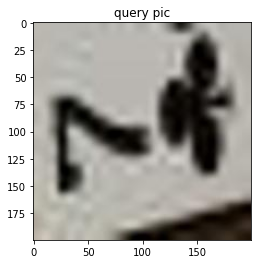

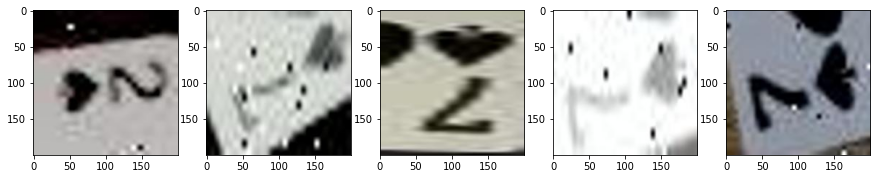

In [289]:
plot_nearest(df_filt, df_test, 24)

In [105]:
from skimage.io import imread
import matplotlib.pyplot as plt

In [290]:
nms_f = [
    'cards/cropped/train',
    'cards/cropped/valid',
    'cards/cropped/test'
]

def get_dataset(names):
    file_nams = []
    for n in names:
        file_nams += glob(n + '/*')
    labels = [int(float(x.split('/')[-1].split('_')[1])) for x in file_nams]
    df = pd.DataFrame({
        'label': labels,
        'path': file_nams
    })
    return df
df_full = get_dataset(nms)


In [301]:
full_dataset = DatasetWithLabels(df_full, dataset_root='./')

In [302]:
full_embeddings = []
for e in full_dataset:
    embeddings = model(torch.unsqueeze(e["input_tensors"].cuda(), dim=0)).cpu()
    full_embeddings.append(embeddings.detach().numpy())

In [305]:
full_embeddings = [x.reshape(-1) for x in full_embeddings]

In [306]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=54).fit(full_embeddings)

In [307]:
clustering.labels_

array([13, 44, 40, ..., 13, 52, 47], dtype=int32)

In [310]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(np.array(full_embeddings))

In [318]:
df_full['label']//10

0       0
1       4
2       2
3       2
4       5
       ..
1691    3
1692    4
1693    1
1694    2
1695    2
Name: label, Length: 1696, dtype: int64

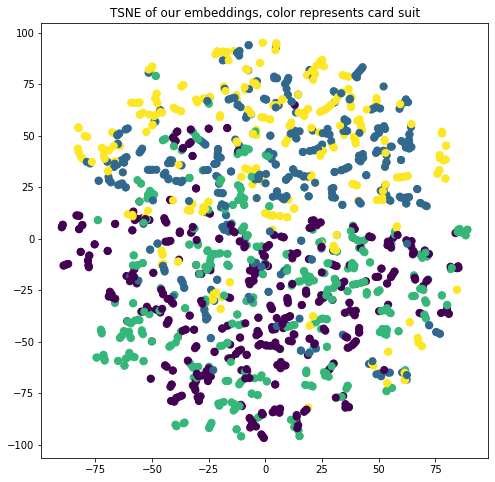

In [327]:
plt.figure(figsize=(8, 8))
plt.title('TSNE of our embeddings, color represents card suit')
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df_full['label']%4, s=50)